In [1]:
import keras
import tensorflow as tf

Using TensorFlow backend.


In [2]:
import sys
print(sys.version)
print(keras.__version__)
print(tf.__version__)

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
2.0.5
1.2.0


![](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

** More on autoencoders in Keras **

[Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)

[Автоэнкодеры в Keras, Части 1-6](https://habrahabr.ru/post/331382/)

### MNIST data

In [3]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### FNN autoencoder

In [5]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [6]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [7]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [10]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s - loss: 0.3684 - val_loss: 0.2725
Epoch 2/50
60000/60000 [==============================] - 7s - loss: 0.2653 - val_loss: 0.2548
Epoch 3/50
60000/60000 [==============================] - 7s - loss: 0.2443 - val_loss: 0.2315
Epoch 4/50
60000/60000 [==============================] - 6s - loss: 0.2232 - val_loss: 0.2129
Epoch 5/50
60000/60000 [==============================] - 6s - loss: 0.2078 - val_loss: 0.2000
Epoch 6/50
60000/60000 [==============================] - 6s - loss: 0.1967 - val_loss: 0.1904
Epoch 7/50
60000/60000 [==============================] - 6s - loss: 0.1880 - val_loss: 0.1828
Epoch 8/50
60000/60000 [==============================] - 6s - loss: 0.1811 - val_loss: 0.1767
Epoch 9/50
60000/60000 [==============================] - 6s - loss: 0.1755 - val_loss: 0.1718
Epoch 10/50
60000/60000 [==============================] - 5s - loss: 0.1708 - val_loss: 0.1672

In [11]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

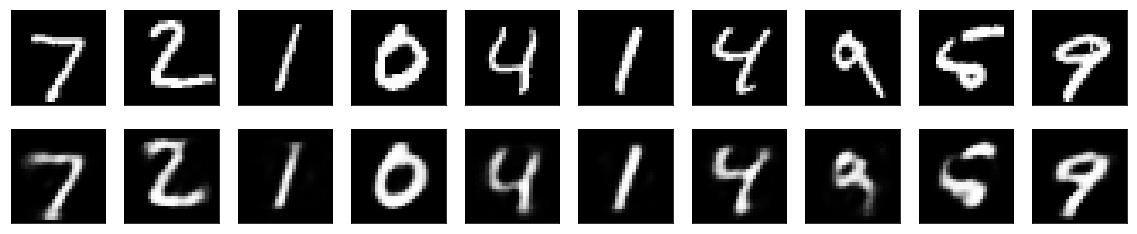

In [12]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
score = autoencoder.evaluate(x_test, x_test)

 9600/10000 [===========================>..] - ETA: 0s

In [14]:
score

0.10260042214393615

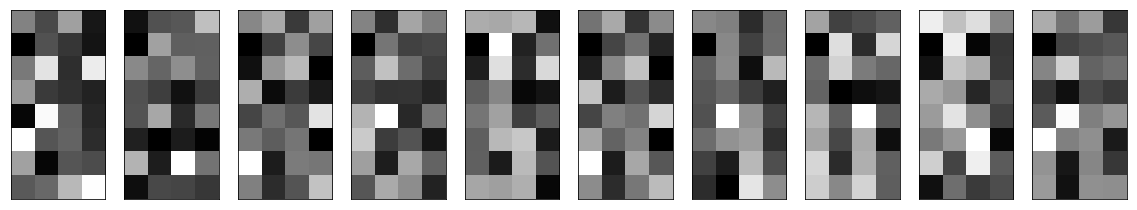

In [15]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep FNN autoencoder

In [16]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [17]:
deep_autoencoder = Model(input_img, decoded)
deep_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

deep_autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s - loss: 0.3434 - val_loss: 0.2634
Epoch 2/100
60000/60000 [==============================] - 1s - loss: 0.2569 - val_loss: 0.2479
Epoch 3/100
60000/60000 [==============================] - 1s - loss: 0.2383 - val_loss: 0.2246
Epoch 4/100
60000/60000 [==============================] - 1s - loss: 0.2158 - val_loss: 0.2050
Epoch 5/100
60000/60000 [==============================] - 1s - loss: 0.2017 - val_loss: 0.1965
Epoch 6/100
60000/60000 [==============================] - 1s - loss: 0.1918 - val_loss: 0.1853
Epoch 7/100
60000/60000 [==============================] - 1s - loss: 0.1835 - val_loss: 0.1787
Epoch 8/100
60000/60000 [==============================] - 1s - loss: 0.1774 - val_loss: 0.1739
Epoch 9/100
60000/60000 [==============================] - 1s - loss: 0.1711 - val_loss: 0.1651
Epoch 10/100
60000/60000 [==============================] - 1s - loss: 0.1653 - val_lo

60000/60000 [==============================] - 1s - loss: 0.1032 - val_loss: 0.1016
Epoch 86/100
60000/60000 [==============================] - 1s - loss: 0.1031 - val_loss: 0.1020
Epoch 87/100
60000/60000 [==============================] - 1s - loss: 0.1028 - val_loss: 0.1024
Epoch 88/100
60000/60000 [==============================] - 1s - loss: 0.1026 - val_loss: 0.1015
Epoch 89/100
60000/60000 [==============================] - 1s - loss: 0.1025 - val_loss: 0.1011
Epoch 90/100
60000/60000 [==============================] - 1s - loss: 0.1022 - val_loss: 0.1012
Epoch 91/100
60000/60000 [==============================] - 1s - loss: 0.1022 - val_loss: 0.0999
Epoch 92/100
60000/60000 [==============================] - 1s - loss: 0.1018 - val_loss: 0.1005
Epoch 93/100
60000/60000 [==============================] - 1s - loss: 0.1019 - val_loss: 0.1002
Epoch 94/100
60000/60000 [==============================] - 1s - loss: 0.1016 - val_loss: 0.1006
Epoch 95/100
60000/60000 [=================

In [18]:
# this model maps an input to its encoded representation
deep_encoder = Model(input_img, encoded)

In [19]:
# create a placeholder for an encoded (32-dimensional) input
deep_encoded_input = Input(shape=(32,))

In [20]:
deep_decoder_layers = deep_autoencoder.layers[-3](deep_encoded_input)
deep_decoder_layers = deep_autoencoder.layers[-2](deep_decoder_layers)
deep_decoder_layers = deep_autoencoder.layers[-1](deep_decoder_layers)
deep_decoder = Model(deep_encoded_input, deep_decoder_layers)

In [21]:
encoded_imgs = deep_encoder.predict(x_test)
decoded_imgs = deep_decoder.predict(encoded_imgs)

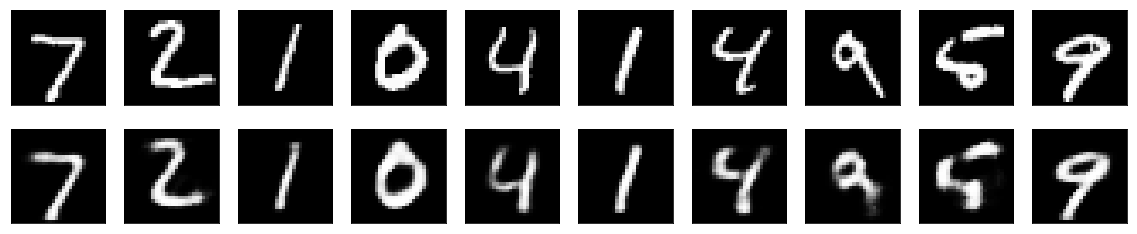

In [22]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
score = deep_autoencoder.evaluate(x_test, x_test)

 9824/10000 [============================>.] - ETA: 0s

In [24]:
score

0.099796982073783874

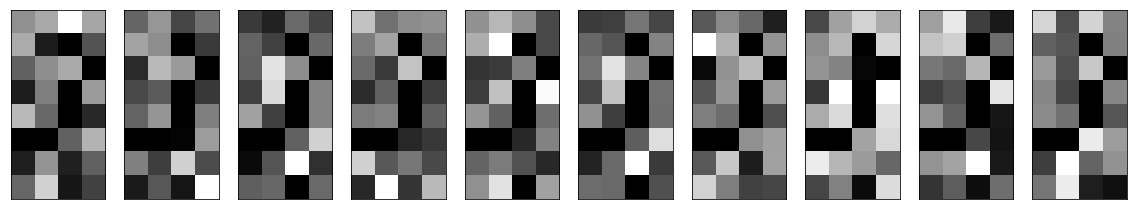

In [25]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep regularized FNN autoencoder

In [26]:
from keras import regularizers

In [27]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l1(10e-7))(input_img)
encoded = Dense(64, activation='relu', activity_regularizer=regularizers.l1(10e-7))(encoded)
encoded = Dense(32, activation='relu', activity_regularizer=regularizers.l1(10e-7))(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [28]:
deep_autoencoder_l1 = Model(input_img, decoded)
deep_autoencoder_l1.compile(optimizer='adadelta', loss='binary_crossentropy')

deep_autoencoder_l1.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s - loss: 0.4548 - val_loss: 0.2712
Epoch 2/100
60000/60000 [==============================] - 1s - loss: 0.2626 - val_loss: 0.2581
Epoch 3/100
60000/60000 [==============================] - 1s - loss: 0.2569 - val_loss: 0.2558
Epoch 4/100
60000/60000 [==============================] - 1s - loss: 0.2551 - val_loss: 0.2543
Epoch 5/100
60000/60000 [==============================] - 1s - loss: 0.2539 - val_loss: 0.2534
Epoch 6/100
60000/60000 [==============================] - 1s - loss: 0.2530 - val_loss: 0.2524
Epoch 7/100
60000/60000 [==============================] - 1s - loss: 0.2521 - val_loss: 0.2517
Epoch 8/100
60000/60000 [==============================] - 1s - loss: 0.2512 - val_loss: 0.2506
Epoch 9/100
60000/60000 [==============================] - 1s - loss: 0.2501 - val_loss: 0.2493
Epoch 10/100
60000/60000 [==============================] - 1s - loss: 0.2488 - val_lo

60000/60000 [==============================] - 1s - loss: 0.1917 - val_loss: 0.1920
Epoch 86/100
60000/60000 [==============================] - 1s - loss: 0.1914 - val_loss: 0.1921
Epoch 87/100
60000/60000 [==============================] - 1s - loss: 0.1911 - val_loss: 0.1914
Epoch 88/100
60000/60000 [==============================] - 1s - loss: 0.1909 - val_loss: 0.1912
Epoch 89/100
60000/60000 [==============================] - 1s - loss: 0.1906 - val_loss: 0.1912
Epoch 90/100
60000/60000 [==============================] - 1s - loss: 0.1903 - val_loss: 0.1904
Epoch 91/100
60000/60000 [==============================] - 1s - loss: 0.1899 - val_loss: 0.1906
Epoch 92/100
60000/60000 [==============================] - 1s - loss: 0.1897 - val_loss: 0.1900
Epoch 93/100
60000/60000 [==============================] - 1s - loss: 0.1894 - val_loss: 0.1899
Epoch 94/100
60000/60000 [==============================] - 1s - loss: 0.1891 - val_loss: 0.1892
Epoch 95/100
60000/60000 [=================

In [29]:
# this model maps an input to its encoded representation
deep_encoder_l1 = Model(input_img, encoded)

In [30]:
# create a placeholder for an encoded (32-dimensional) input
deep_encoded_input_l1 = Input(shape=(32,))

In [31]:
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-3](deep_encoded_input_l1)
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-2](deep_decoder_layers_l1)
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-1](deep_decoder_layers_l1)
deep_decoder_l1 = Model(deep_encoded_input_l1, deep_decoder_layers_l1)

In [32]:
encoded_imgs = deep_encoder_l1.predict(x_test)
decoded_imgs = deep_decoder_l1.predict(encoded_imgs)

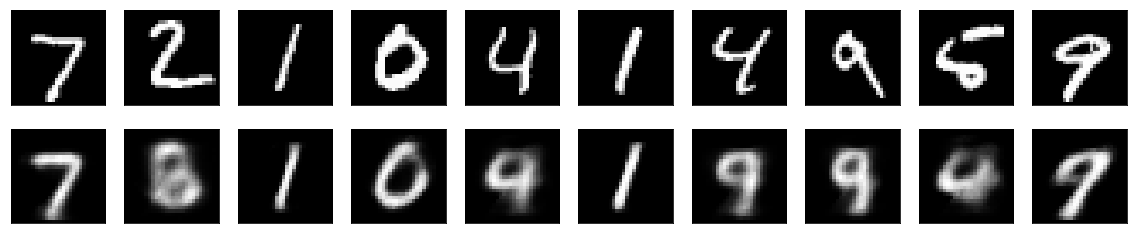

In [33]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [34]:
score = deep_autoencoder_l1.evaluate(x_test, x_test)

 9728/10000 [============================>.] - ETA: 0s

In [35]:
score

0.1861714584827423

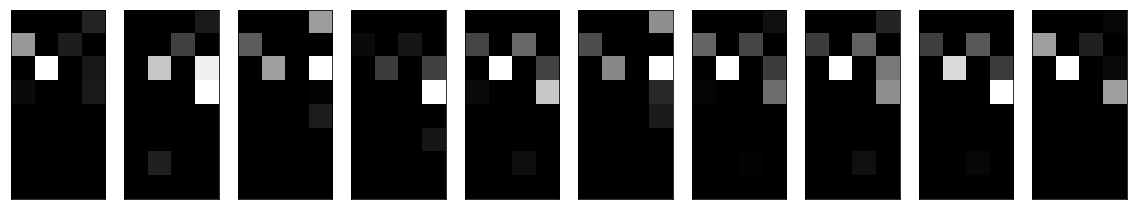

In [36]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Denoising autoencoder

In [37]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

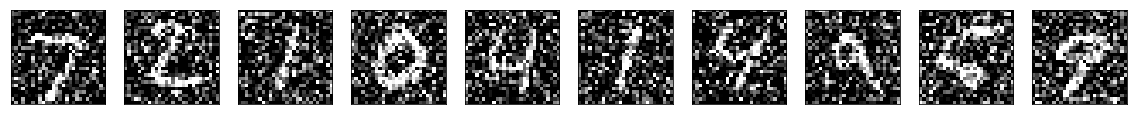

In [38]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [39]:
x_train_noisy = x_train.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [40]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [41]:
denoising_autoencoder = Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

denoising_autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s - loss: 0.3750 - val_loss: 0.2638
Epoch 2/100
60000/60000 [==============================] - 1s - loss: 0.2598 - val_loss: 0.2621
Epoch 3/100
60000/60000 [==============================] - 1s - loss: 0.2481 - val_loss: 0.2555
Epoch 4/100
60000/60000 [==============================] - 1s - loss: 0.2294 - val_loss: 0.2551
Epoch 5/100
60000/60000 [==============================] - 1s - loss: 0.2149 - val_loss: 0.2498
Epoch 6/100
60000/60000 [==============================] - 1s - loss: 0.2045 - val_loss: 0.2485
Epoch 7/100
60000/60000 [==============================] - 1s - loss: 0.1967 - val_loss: 0.2467
Epoch 8/100
60000/60000 [==============================] - 1s - loss: 0.1900 - val_loss: 0.2469
Epoch 9/100
60000/60000 [==============================] - 1s - loss: 0.1822 - val_loss: 0.2686
Epoch 10/100
60000/60000 [==============================] - 1s - loss: 0.1756 - val_lo

60000/60000 [==============================] - 1s - loss: 0.1050 - val_loss: 0.2659
Epoch 86/100
60000/60000 [==============================] - 1s - loss: 0.1048 - val_loss: 0.2836
Epoch 87/100
60000/60000 [==============================] - 1s - loss: 0.1046 - val_loss: 0.2948
Epoch 88/100
60000/60000 [==============================] - 1s - loss: 0.1046 - val_loss: 0.3000
Epoch 89/100
60000/60000 [==============================] - 1s - loss: 0.1043 - val_loss: 0.3045
Epoch 90/100
60000/60000 [==============================] - 1s - loss: 0.1043 - val_loss: 0.2928
Epoch 91/100
60000/60000 [==============================] - 1s - loss: 0.1041 - val_loss: 0.2796
Epoch 92/100
60000/60000 [==============================] - 1s - loss: 0.1038 - val_loss: 0.2766
Epoch 93/100
60000/60000 [==============================] - 1s - loss: 0.1037 - val_loss: 0.2920
Epoch 94/100
60000/60000 [==============================] - 1s - loss: 0.1037 - val_loss: 0.2856
Epoch 95/100
60000/60000 [=================

In [42]:
denoising_encoder = Model(input_img, encoded)
denoising_input = Input(shape=(32,))
denoising_decoder_layers = denoising_autoencoder.layers[-3](denoising_input)
denoising_decoder_layers = denoising_autoencoder.layers[-2](denoising_decoder_layers)
denoising_decoder_layers = denoising_autoencoder.layers[-1](denoising_decoder_layers)
denoising_decoder = Model(denoising_input, denoising_decoder_layers)

encoded_imgs = denoising_encoder.predict(x_test_noisy)
decoded_imgs = denoising_decoder.predict(encoded_imgs)

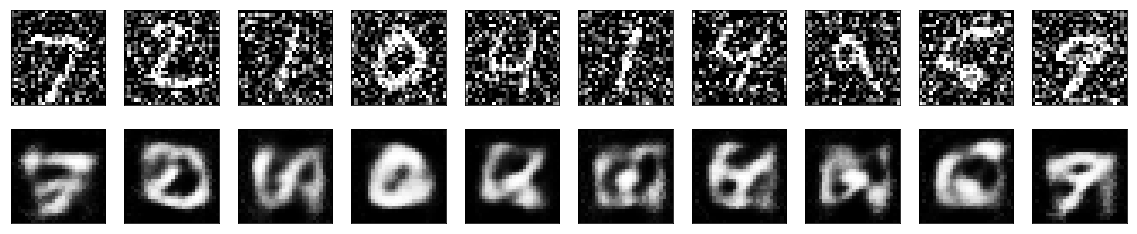

In [43]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### What´s next?

* Convolutional autoencoders
* Sequence-to-sequence autoencoder
* Variational autoencoders (VAE)
* GANs